#Read in Data

In [1]:
import pandas as pd
x_train = pd.read_csv('final_APA_X_train.csv')
x_test = pd.read_csv('final_APA_X_val.csv')
y_train = pd.read_csv('final_APA_y_train.csv')
y_test = pd.read_csv('final_APA_y_val.csv')

In [2]:
x_train.head(3)

,overall,potential,wage_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,passing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.137931,0.290323,0.012876,0.304348,0.617021,0.298246,0.009039,0.652174,0.565789,0.500000,...,1938.0,2.0,3,2024.0,1,4.0,3.0,1.0,2,2
1,0.379310,0.451613,0.118741,0.391304,0.510638,0.315789,0.036625,0.695652,0.381579,0.533333,...,144.0,2.0,1,2024.0,1,2.0,2.0,1.0,2,2
2,0.275862,0.419355,0.030043,0.434783,0.638298,0.473684,0.012789,0.550725,0.671053,0.533333,...,897.0,1.0,2,2022.0,1,3.0,2.0,1.0,0,2


In [3]:
y_train.head(3)

,value_eur
0,0.008767
1,0.035585
2,0.015472


In [4]:
x_test.head(3)

,overall,potential,wage_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,passing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.034483,0.032258,0.004292,0.782609,0.297872,0.385965,0.000637,0.637681,0.513158,0.466667,...,113149.0,1.0,3,2021.0,0,3.0,3.0,1.0,0,2
1,0.103448,0.096774,0.001431,0.782609,0.404255,0.350877,0.001473,0.695652,0.644737,0.466667,...,113302.0,1.0,0,2022.0,1,4.0,3.0,1.0,0,2
2,0.034483,0.580645,0.004292,0.130435,0.510638,0.403509,0.009843,0.565217,0.526316,0.466667,...,110396.0,1.0,2,2023.0,0,3.0,2.0,1.0,2,2


In [6]:
y_test.head(3)

,value_eur
0,0.000774
1,0.002063
2,0.008767


In [8]:
print(x_train.isnull().values.any())
print(x_test.isnull().values.any())
print(y_train.isnull().values.any())
print(y_test.isnull().values.any())

False
False
False
False


In [9]:
x_train.shape

(8861, 54)

In [10]:
y_train.shape

(8861, 1)

In [11]:
x_test.shape

(985, 54)

In [12]:
y_test.shape

(985, 1)

In [13]:
#Installation
!pip install interpret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 30.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 18.3 MB/s eta 0:00:00


In [14]:
from pandas.core.window.rolling import numba_notes
#Regression Models
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor as XGBRegressor
#Linear Regression ( https://www.w3schools.com/python/python_ml_multiple_regression.asp )
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#Ridge Regression ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html )
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
#Lasso Regression ( https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d )
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
lasso = linear_model.Lasso(alpha=0.1)
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
#Random Forrest ( https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 )
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#Decision Trees ( https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16 )
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#SVM - SVR
from sklearn import svm
SVM = svm.SVR()
#Gradient Boosting Regressor ( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor )
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
# create an xgboost regression model: higher performance than gradient boosting
import xgboost as xg
xgb = xg.XGBRegressor()
#EBM Model
#interpretml
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree
ebm = ExplainableBoostingRegressor()

In [15]:
model_names = ['Multiple Regression', 'Ridge Regression', 'Lasso Regression', 'KNeighborsRegressor', 'Random Forrest', 'Decision Trees', 'SVM - SVR', 'Gradient Boosting Regressor', 'XGBoost', 'EBM']
models = [lm, ridge, lasso, neigh, rf, dt, SVM, gbr, xgb, ebm]

##Run each model

In [16]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
model_eval = []
for model in models:
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  type(predictions)
  # Calculate the absolute errors
  errors = abs(predictions - y_test.values)
  # Calculate model evaluation metrics
  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, predictions)
  print(f'MODEL: {model}')
  print('Mean Absolute Error: ', mae, ' degrees.')
  print('Mean Squared Error:', mse, ' degrees')
  print('RMSE:', rmse, ' degrees')
  print('R2:', r2)
  model_eval.append({'Model': model, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'RMSE': rmse,'R-squared': r2})

df = pd.DataFrame(model_eval)

MODEL: LinearRegression()
Mean Absolute Error:  0.0022959775452661662  degrees.
Mean Squared Error: 2.6741939899128816e-05  degrees
RMSE: 0.005171260958328134  degrees
R2: 0.989634726987857
MODEL: Ridge(alpha=0.5)
Mean Absolute Error:  0.0026695469433808453  degrees.
Mean Squared Error: 3.26669600352905e-05  degrees
RMSE: 0.005715501730844852  degrees
R2: 0.9873381676677249
MODEL: Lasso(alpha=0.1)
Mean Absolute Error:  0.022405860008677937  degrees.
Mean Squared Error: 0.002448494882025173  degrees
RMSE: 0.04948226835973845  degrees
R2: 0.050954492577691246
MODEL: KNeighborsRegressor(n_neighbors=2)
Mean Absolute Error:  0.014276289782529589  degrees.
Mean Squared Error: 0.001342620627845297  degrees
RMSE: 0.03664178800011398  degrees
R2: 0.4795953692273234


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MODEL: RandomForestRegressor()
Mean Absolute Error:  0.001320412164939276  degrees.
Mean Squared Error: 1.5098562167988459e-05  degrees
RMSE: 0.003885686833493978  degrees
R2: 0.9941477424767112
MODEL: DecisionTreeRegressor()
Mean Absolute Error:  0.0016945518517839802  degrees.
Mean Squared Error: 3.0207401972991982e-05  degrees
RMSE: 0.005496126087799659  degrees
R2: 0.9882915013039946


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: SVR()
Mean Absolute Error:  0.08803004912891527  degrees.
Mean Squared Error: 0.00855869832554107  degrees
RMSE: 0.09251323324552585  degrees
R2: -2.3173825499358673


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: GradientBoostingRegressor(random_state=0)
Mean Absolute Error:  0.0014450461225640973  degrees.
Mean Squared Error: 9.933054195983096e-06  degrees
RMSE: 0.003151674823959968  degrees
R2: 0.9961499121240217
MODEL: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error:  0.001216385

In [17]:
#Low MAE, MSE, RMSE values are good
df

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,LinearRegression(),0.002296,0.000027,0.005171,0.989635
1,Ridge(alpha=0.5),0.002670,0.000033,0.005716,0.987338
2,Lasso(alpha=0.1),0.022406,0.002448,0.049482,0.050954
3,KNeighborsRegressor(n_neighbors=2),0.014276,0.001343,0.036642,0.479595
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.001320,0.000015,0.003886,0.994148
5,DecisionTreeRegressor(),0.001695,0.000030,0.005496,0.988292
6,SVR(),0.088030,0.008559,0.092513,-2.317383
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.001445,0.000010,0.003152,0.996150
8,"XGBRegressor(base_score=None, booster=None, ca...",0.001216,0.000020,0.004486,0.992198
9,ExplainableBoostingRegressor(),0.001466,0.000017,0.004158,0.993297


In [18]:
df['Average Error']  = df[['Mean Absolute Error', 'Mean Squared Error', 'RMSE', 'R-squared']].mean(axis=1)
df

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared,Average Error
0,LinearRegression(),0.002296,0.000027,0.005171,0.989635,0.249282
1,Ridge(alpha=0.5),0.002670,0.000033,0.005716,0.987338,0.248939
2,Lasso(alpha=0.1),0.022406,0.002448,0.049482,0.050954,0.031323
3,KNeighborsRegressor(n_neighbors=2),0.014276,0.001343,0.036642,0.479595,0.132964
4,"(DecisionTreeRegressor(max_features=1.0, rando...",0.001320,0.000015,0.003886,0.994148,0.249842
5,DecisionTreeRegressor(),0.001695,0.000030,0.005496,0.988292,0.248878
6,SVR(),0.088030,0.008559,0.092513,-2.317383,-0.532070
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.001445,0.000010,0.003152,0.996150,0.250189
8,"XGBRegressor(base_score=None, booster=None, ca...",0.001216,0.000020,0.004486,0.992198,0.249480
9,ExplainableBoostingRegressor(),0.001466,0.000017,0.004158,0.993297,0.249735


In [19]:
print(df['Model'])

0                                   LinearRegression()
1                                     Ridge(alpha=0.5)
2                                     Lasso(alpha=0.1)
3                   KNeighborsRegressor(n_neighbors=2)
4    (DecisionTreeRegressor(max_features=1.0, rando...
5                              DecisionTreeRegressor()
6                                                SVR()
7    ([DecisionTreeRegressor(criterion='friedman_ms...
8    XGBRegressor(base_score=None, booster=None, ca...
9                       ExplainableBoostingRegressor()
Name: Model, dtype: object


In [20]:
models = [lm, ridge, lasso, neigh, rf, dt, SVM, gbr, xgb, ebm]
ms = ['Linear Regression', 'Ridge Regression', 'Lasso', 'K-Nearest Regressor', 'Random Forrest', 'Decision Tree', 'Support Vector Machines', 'Gradient Boosting', 'XGBoost', 'EBM']

In [21]:
#Best models in order: RF, DT,  Linear, Ridge, KNR, SVR,
df.insert(1, 'Model_nice_name', ms)
df

,Model,Model_nice_name,Mean Absolute Error,Mean Squared Error,RMSE,R-squared,Average Error
0,LinearRegression(),Linear Regression,0.002296,0.000027,0.005171,0.989635,0.249282
1,Ridge(alpha=0.5),Ridge Regression,0.002670,0.000033,0.005716,0.987338,0.248939
2,Lasso(alpha=0.1),Lasso,0.022406,0.002448,0.049482,0.050954,0.031323
3,KNeighborsRegressor(n_neighbors=2),K-Nearest Regressor,0.014276,0.001343,0.036642,0.479595,0.132964
4,"(DecisionTreeRegressor(max_features=1.0, rando...",Random Forrest,0.001320,0.000015,0.003886,0.994148,0.249842
5,DecisionTreeRegressor(),Decision Tree,0.001695,0.000030,0.005496,0.988292,0.248878
6,SVR(),Support Vector Machines,0.088030,0.008559,0.092513,-2.317383,-0.532070
7,([DecisionTreeRegressor(criterion='friedman_ms...,Gradient Boosting,0.001445,0.000010,0.003152,0.996150,0.250189
8,"XGBRegressor(base_score=None, booster=None, ca...",XGBoost,0.001216,0.000020,0.004486,0.992198,0.249480
9,ExplainableBoostingRegressor(),EBM,0.001466,0.000017,0.004158,0.993297,0.249735


In [22]:
df

,Model,Model_nice_name,Mean Absolute Error,Mean Squared Error,RMSE,R-squared,Average Error
0,LinearRegression(),Linear Regression,0.002296,0.000027,0.005171,0.989635,0.249282
1,Ridge(alpha=0.5),Ridge Regression,0.002670,0.000033,0.005716,0.987338,0.248939
2,Lasso(alpha=0.1),Lasso,0.022406,0.002448,0.049482,0.050954,0.031323
3,KNeighborsRegressor(n_neighbors=2),K-Nearest Regressor,0.014276,0.001343,0.036642,0.479595,0.132964
4,"(DecisionTreeRegressor(max_features=1.0, rando...",Random Forrest,0.001320,0.000015,0.003886,0.994148,0.249842
5,DecisionTreeRegressor(),Decision Tree,0.001695,0.000030,0.005496,0.988292,0.248878
6,SVR(),Support Vector Machines,0.088030,0.008559,0.092513,-2.317383,-0.532070
7,([DecisionTreeRegressor(criterion='friedman_ms...,Gradient Boosting,0.001445,0.000010,0.003152,0.996150,0.250189
8,"XGBRegressor(base_score=None, booster=None, ca...",XGBoost,0.001216,0.000020,0.004486,0.992198,0.249480
9,ExplainableBoostingRegressor(),EBM,0.001466,0.000017,0.004158,0.993297,0.249735


In [23]:
from google.colab import files
df.to_csv('Basic_models_results.csv', index=None)
files.download("Basic_models_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Optimizing Models





# **1. Linear Regression**

In [24]:
df.iloc[0]['Model']

LinearRegression()

In [25]:
linr = LinearRegression()
linr.fit(x_train, y_train)
pred = linr.predict(x_test)

Text(0, 0.5, 'y_test')

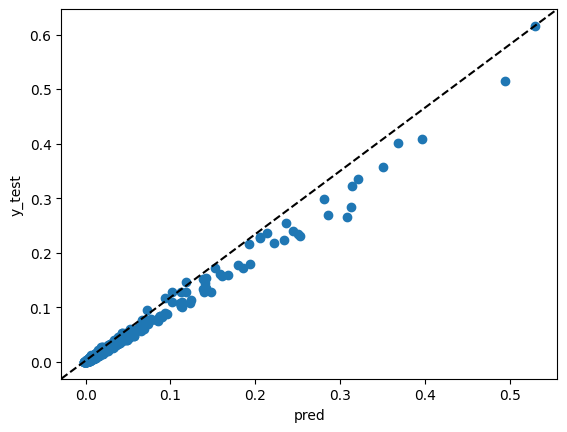

In [26]:
pred = linr.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

2.6741939899128816e-05

In [28]:
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

In [29]:
print(f'Model: {linr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: <interpret.glassbox._linear.LinearRegression object at 0x79c6b7479360>, MAE: 0.0022959775452661662, MSE: 2.6741939899128816e-05, RMSE: 0.005171260958328134


HyperPerameter Tuning

Not possible with Linear Regression

# **2. Ridge Regression**

In [31]:
df.iloc[1]['Model']

Ridge(alpha=0.5)

In [32]:
ridger = linear_model.Ridge(alpha=0.5)
ridger.fit(x_train, y_train)
pred = ridger.predict(x_test)

Text(0, 0.5, 'y_test')

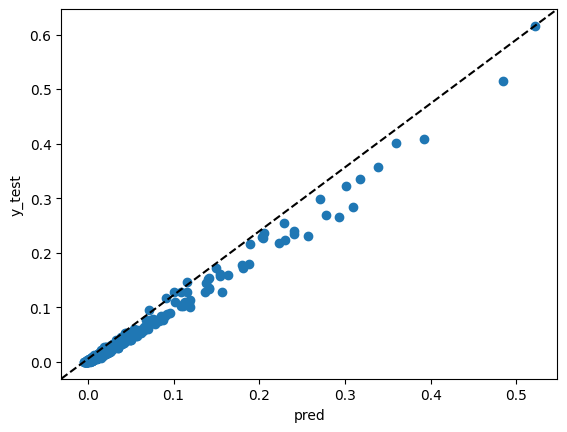

In [33]:
pred = ridger.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [34]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

In [35]:
print(f'Model: {ridger}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: Ridge(alpha=0.5), MAE: 0.0026695469433808453, MSE: 3.26669600352905e-05, RMSE: 0.005715501730844852


HyperParameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# grid search hyperparameters for ridge regression
from numpy import arange
model = linear_model.Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train)
print('MAE: %.6f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.002206
Config: {'alpha': 0.0}


In [37]:
#-0.002944 beats prevbious MAE of 0.002979

# **3. Lasso Regression**

In [38]:
df.iloc[2]['Model']

Lasso(alpha=0.1)

In [39]:
lass = linear_model.Lasso(alpha=0.5)
lass.fit(x_train, y_train)
pred = lass.predict(x_test)

Text(0, 0.5, 'y_test')

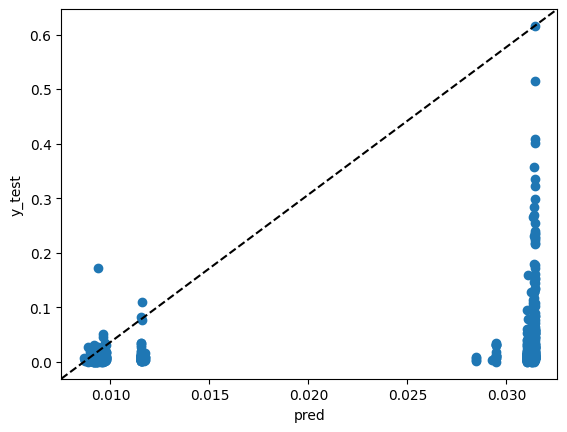

In [40]:
pred = lass.predict(x_test)
import matplotlib.pyplot as plt
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [41]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

In [42]:
print(f'Model: {ridger}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: Ridge(alpha=0.5), MAE: 0.022405551914669544, MSE: 0.0024485107394530536, RMSE: 0.04948242859291623


HyperParameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# grid search hyperparameters for ridge regression
from numpy import arange
model = linear_model.Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train)
print('MAE: %.6f' % results.best_score_)
print('Config: %s' % results.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


MAE: -0.002204
Config: {'alpha': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.989e-02, tolerance: 2.209e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [44]:
#-0.00294 beats previous MAE score of 0.016184


#  **4. K-Nearest Regressor**

In [45]:
df.iloc[3]['Model']

KNeighborsRegressor(n_neighbors=2)

In [46]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train, y_train)
pred = knr.predict(x_test)

Text(0, 0.5, 'y_test')

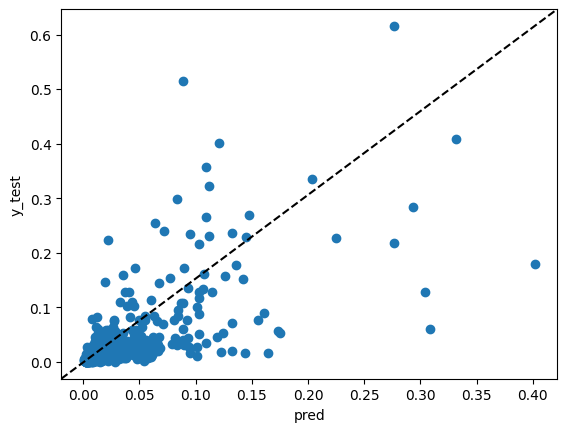

In [47]:
pred = knr.predict(x_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [48]:
from sklearn.metrics import mean_squared_error, accuracy_score
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, pred)

In [49]:
print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}, r2: {r2}')

Model: KNeighborsRegressor(n_neighbors=2), MAE: 0.014276289782529589, MSE: 0.001342620627845297, RMSE: 0.03664178800011398, r2: 0.4795953692273234


Hyperparameter tuning

In [50]:
#Square Root of N
# = SQR(15,336) = 124/2 = 62
#Want a high r squared value

In [51]:
scores_dict = {}

In [52]:
num_list = []
for i in range(30, 91):
  num_list.append(i)

In [53]:
from sklearn.metrics import r2_score
mae_scores = []
rmse_scores = []
ks = []
for i in range(20, 90):
  ks.append(i)
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  mae = mean_absolute_error(y_test, pred_i)
  mse = mean_squared_error(y_test, pred_i)
  rmse = sqrt(mse)
  rmse_scores.append(rmse)

  mae_scores.append(mae)




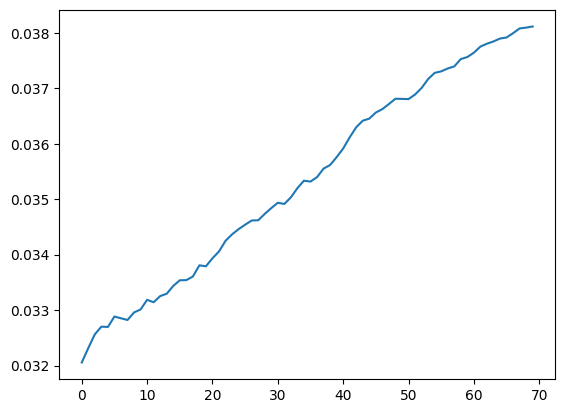

In [54]:
plt.plot(rmse_scores)

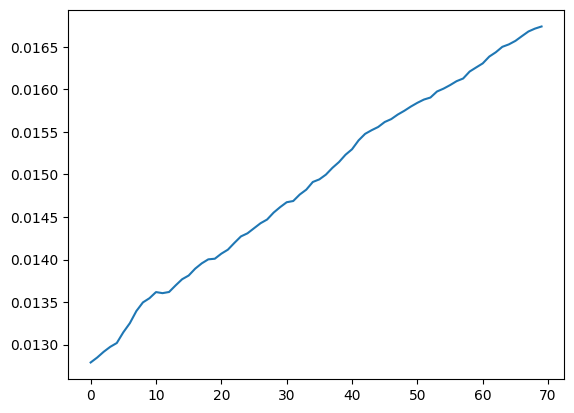

In [55]:
plt.plot(mae_scores)

HyperParameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring = 'r2')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='r2')

In [57]:
grid_scores = grid.cv_results_
grid_scores

{'mean_fit_time': array([0.00750616, 0.00747938, 0.00904434, 0.00967834, 0.009372  ,
        0.00947933, 0.00822387, 0.00697503, 0.00697401, 0.00692255,
        0.0072768 , 0.00688429, 0.00703135, 0.00701571, 0.0067513 ,
        0.00749817, 0.00696888, 0.00674076, 0.00679116, 0.00681648,
        0.00673506, 0.00704646, 0.00958936, 0.00964112, 0.00944302,
        0.01017692, 0.00737398, 0.00656433, 0.00708244, 0.00678802]),
 'std_fit_time': array([0.00134725, 0.00162973, 0.00054551, 0.00150006, 0.00042047,
        0.00078012, 0.00134097, 0.00096322, 0.00023427, 0.00020331,
        0.00095809, 0.00023695, 0.00083021, 0.00078154, 0.00013332,
        0.00083324, 0.00053055, 0.00021221, 0.00073511, 0.00021013,
        0.00022179, 0.00107147, 0.00116837, 0.00082763, 0.00034635,
        0.00256442, 0.00126139, 0.00018597, 0.00077955, 0.00029046]),
 'mean_score_time': array([0.0559458 , 0.06163104, 0.08944888, 0.08996651, 0.09448586,
        0.09367356, 0.07407005, 0.0555804 , 0.05496154, 0.05

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
#Convert to dictionary
# Create 3 folds
# Select an algorithm
algorithm = KNeighborsRegressor()
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')

#Fit the model
best_model = grid.fit(x_train, y_train)
#Print The value of best Hyperparameters
print('MAE: %.6f' % best_model.best_score_)
print('Config: %s' % best_model.best_params_)



MAE: 0.628750
Config: {'n_neighbors': 5, 'weights': 'distance'}


In [59]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=2), MAE: 0.014276289782529589, MSE: 0.001342620627845297, RMSE: 0.03664178800011398


In [60]:
knr = KNeighborsRegressor(n_neighbors=30)
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=30), MAE: 0.01361679010147921, MSE: 0.0011012791709415842, RMSE: 0.03318552652801495


In [61]:
knr = KNeighborsRegressor(n_neighbors=62)
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=62), MAE: 0.01547774292944805, MSE: 0.0013175273585818439, RMSE: 0.03629775969094847


In [62]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=2), MAE: 0.014276289782529589, MSE: 0.001342620627845297, RMSE: 0.03664178800011398


In [63]:
knr = KNeighborsRegressor(n_neighbors = 6, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=6, weights='distance'), MAE: 0.012344232735721564, MSE: 0.0009791069179563223, RMSE: 0.031290684204029834


In [64]:
knr = KNeighborsRegressor(n_neighbors = 8, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=8, weights='distance'), MAE: 0.012118137967706178, MSE: 0.0009628670927130005, RMSE: 0.031030099785740305


In [65]:
knr = KNeighborsRegressor(n_neighbors = 9, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=9, weights='distance'), MAE: 0.012233638369437866, MSE: 0.0009882133807544353, RMSE: 0.03143586138082485


In [66]:
knr = KNeighborsRegressor(n_neighbors = 10, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=10, weights='distance'), MAE: 0.01203398705666428, MSE: 0.0009542115374140805, RMSE: 0.030890314621480962


In [67]:
knr = KNeighborsRegressor(n_neighbors = 11, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=11, weights='distance'), MAE: 0.011992367614457022, MSE: 0.0009521739994225439, RMSE: 0.03085731678909467


In [68]:
knr = KNeighborsRegressor(n_neighbors = 12, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=12, weights='distance'), MAE: 0.012175761299438976, MSE: 0.0009854484981849944, RMSE: 0.03139185400999747


In [69]:
knr = KNeighborsRegressor(n_neighbors = 15, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = sqrt(mse)

print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=15, weights='distance'), MAE: 0.012137102913307617, MSE: 0.0009531855319328709, RMSE: 0.030873702919035656


DOESN'T beat previous MAE score of 0.008683948338660583

# **5. Random Forrest Regressor**




In [71]:
df.iloc[4]['Model']

RandomForestRegressor()

In [72]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [73]:
pred = model.predict(x_test)
mean_squared_error(y_test, pred)

1.7411785876292112e-05

In [74]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 7]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 7], 'bootstrap': [True, False]}


In [75]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 2 folds for each of 15 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [100, 325, 550, 775,
                                                         1000]},
                   random_state=42, verbose=2)

In [76]:
rf_random.best_params_

{'n_estimators': 550,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': False}

In [77]:
print(rf_random.best_estimator_)

RandomForestRegressor(bootstrap=False, max_depth=7, max_features='sqrt',
                      n_estimators=550)


Best Model

In [78]:
best_random = rf_random.best_estimator_
pred = best_random.predict(x_test)
mean_squared_error(y_test, pred)

8.254812617361052e-05

# **6. Decision Tree Regressor**

## Initial Model set up

In [79]:
df.iloc[5]['Model']

DecisionTreeRegressor()

In [80]:
regr2 = DecisionTreeRegressor()
regr2.fit(x_train, y_train)
pred = regr2.predict(x_test)

In [81]:
mean_squared_error(y_test, pred)

3.729878436262677e-05

In [82]:
# This function creates images of tree models using pydot
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

<ipython-input-82-9bf59eef03ec>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


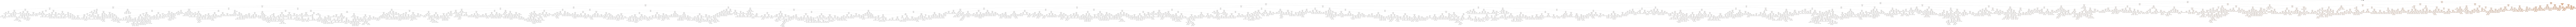

In [83]:
graph, = print_tree(regr2, features=x_train.columns)
Image(graph.create_png())

Text(0, 0.5, 'y_test')

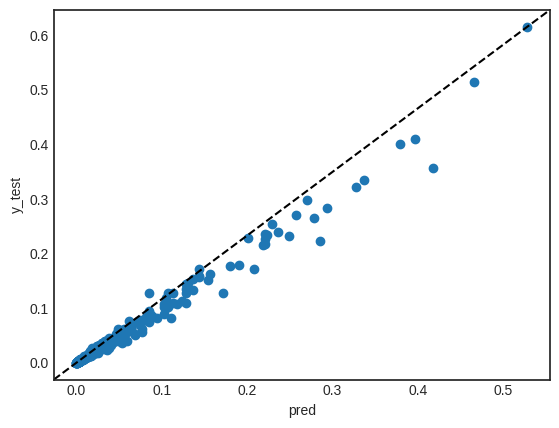

In [84]:
pred = regr2.predict(x_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [85]:
regr2.tree_.max_depth

24

## HyperParameter Tuning

In [86]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3],
            "min_samples_leaf":[1,3,5,7,9],
           "min_weight_fraction_leaf":[0.2,0.4,0.6,0.8],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,5,10,15,20] }



In [87]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(x_train, y_train)

print('MAE: %.6f' % tuning_model.best_score_)
print('Config: %s' % tuning_model.best_params_)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, min_weight_fraction_leaf=0.6, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, min_weight_fraction_leaf=0.8, splitter=random;, score=nan total ti

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
4500 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

MAE: -0.001598
Config: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


In [88]:
# print best parameter after tuning
print(tuning_model.best_params_)
print(tuning_model.best_estimator_)


{'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'}
DecisionTreeRegressor(max_depth=3, min_weight_fraction_leaf=0.2)


In [91]:
best_dt = DecisionTreeRegressor(max_depth= 3, min_samples_leaf= 1, min_weight_fraction_leaf=0.2, splitter='best')
best_dt.fit(x_train, y_train)
pred = best_dt.predict(x_test)
mean_squared_error(y_test, pred)

0.0017060515419527616

# **7. Support Vector Machines**

In [92]:
df.iloc[6]['Model']

SVR()

In [93]:
from sklearn.svm import SVR
SVM = SVR()
SVM.fit(x_train, y_train)
pred = SVM.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'y_test')

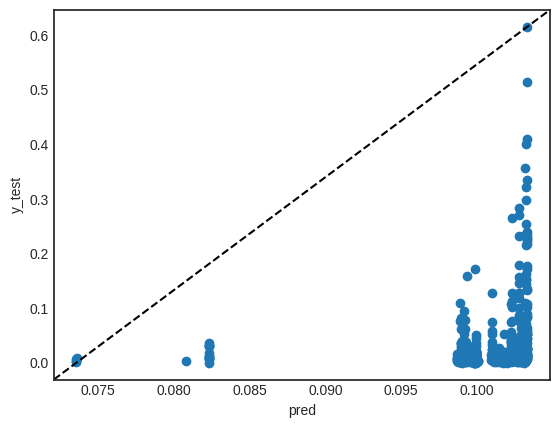

In [94]:
plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [95]:
mean_squared_error(y_test, pred)

0.00855869832554107

HyperParameter Tuning

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10), 'kernel': ['rbf']}


In [97]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': ['rbf']}
grid_search = GridSearchCV(svm.SVR(), refit = True, verbose = 3, param_grid = param_grid)
grid_search.fit(x_train, y_train)

# print best parameter after tuning
print(grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-2.754 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-2.404 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-2.276 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-2.467 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .C=0.001, gamma=0.001, kernel=rbf;, score=-2.515 total time=   0.2s
[CV 1/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-2.760 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-2.410 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-2.287 total time=   0.2s
[CV 4/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-2.482 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.001, gamma=0.01, kernel=rbf;, score=-2.513 total time=   0.2s
[CV 1/5] END ...C=0.001, gamma=0.1, kernel=rbf;, score=-2.785 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.001, gamma=0.1, kernel=rbf;, score=-2.443 total time=   0.2s
[CV 3/5] END ...C=0.001, gamma=0.1, kernel=rbf;, score=-2.312 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.001, gamma=0.1, kernel=rbf;, score=-2.503 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.001, gamma=0.1, kernel=rbf;, score=-2.532 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-2.774 total time=   0.2s
[CV 2/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-2.427 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-2.304 total time=   0.1s
[CV 4/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-2.485 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-2.529 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.01, gamma=0.001, kernel=rbf;, score=-2.726 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=0.01, gamma=0.001, kernel=rbf;, score=-2.382 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.01, gamma=0.001, kernel=rbf;, score=-2.254 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=0.01, gamma=0.001, kernel=rbf;, score=-2.459 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.01, gamma=0.001, kernel=rbf;, score=-2.491 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-2.740 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-2.379 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-2.254 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-2.467 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.01, gamma=0.01, kernel=rbf;, score=-2.495 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-2.834 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-2.474 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-2.347 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-2.554 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.01, gamma=0.1, kernel=rbf;, score=-2.597 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-2.907 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-2.543 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-2.414 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-2.605 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.01, gamma=1, kernel=rbf;, score=-2.647 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-2.623 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-2.257 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-2.131 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-2.384 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.001, kernel=rbf;, score=-2.394 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-2.560 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-2.172 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-2.056 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-2.319 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-2.348 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-2.837 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-2.436 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-2.299 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-2.574 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-2.613 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-3.128 total time=   2.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-2.727 total time=   3.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-2.586 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-2.802 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-2.841 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-2.295 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-1.837 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-1.780 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-2.104 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.001, kernel=rbf;, score=-2.095 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-2.350 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-1.963 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-1.836 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-2.064 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.01, kernel=rbf;, score=-2.080 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-2.860 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-2.405 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-2.265 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-2.590 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-2.589 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-3.260 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=1, gamma=1, kernel=rbf;, score=-2.832 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=1, gamma=1, kernel=rbf;, score=-2.691 total time=   2.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=1, gamma=1, kernel=rbf;, score=-2.930 total time=   2.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=1, gamma=1, kernel=rbf;, score=-2.984 total time=   3.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-2.036 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-1.600 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-1.538 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-1.821 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.001, kernel=rbf;, score=-1.213 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-2.347 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-1.925 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-1.811 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-1.992 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.01, kernel=rbf;, score=-2.089 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-2.860 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-2.405 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-2.265 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-2.590 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.1, kernel=rbf;, score=-2.589 total time=   2.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=10, gamma=1, kernel=rbf;, score=-3.260 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=10, gamma=1, kernel=rbf;, score=-2.832 total time=   3.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=10, gamma=1, kernel=rbf;, score=-2.691 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=10, gamma=1, kernel=rbf;, score=-2.930 total time=   3.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=10, gamma=1, kernel=rbf;, score=-2.984 total time=   3.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=10, gamma=0.001)


In [98]:
# print best parameter after tuning
print(grid_search.best_params_)
print(grid_search.best_estimator_)


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVR(C=10, gamma=0.001)


In [99]:
SVM = SVR(C=10, gamma=0.001)
SVM.fit(x_train, y_train)
pred = SVM.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [100]:
mean_squared_error(y_test, pred)

0.006140536515639318

# **8. Gradient Boosting**

In [101]:
df.iloc[7]['Model']

GradientBoostingRegressor(random_state=0)

In [102]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'y_test')

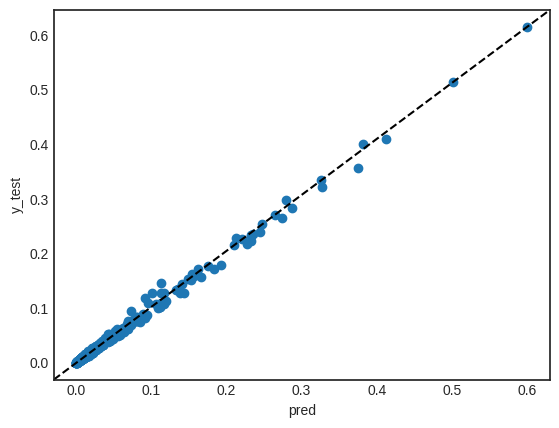

In [103]:
pred = gbr.predict(x_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [104]:
mean_squared_error(y_test, pred)

9.933054195983096e-06

## HyperParameter Tuning

In [105]:
from sklearn.metrics import mean_squared_error as mse

def test_params(**params):
    model = GradientBoostingRegressor(random_state=0, **params)
    model.fit(x_train, y_train)

    train_rmse = sqrt(mse(model.predict(x_train), y_train))
    val_rmse = sqrt(mse(model.predict(x_test), y_test))
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [106]:
test_params(n_estimators=10)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 0.018612510884666637, Validation RMSE: 0.01927509511290879


In [107]:
test_params(n_estimators=30)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 0.004362834878559289, Validation RMSE: 0.0049956810837150645


In [108]:
#crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
GBR=GradientBoostingRegressor(random_state=0)
search_grid={'n_estimators':range(20,81,10),'learning_rate':[0.02]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [110]:
search.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             n_jobs=1,
             param_grid={'learning_rate': [0.02],
                         'n_estimators': range(20, 81, 10)},
             scoring='neg_mean_squared_error')

In [111]:
# print best parameter after tuning
print(search.best_params_)

# print how our model looks after hyper-parameter tuning
print(search.best_estimator_)

{'learning_rate': 0.02, 'n_estimators': 80}
GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)


In [112]:
gbr = GradientBoostingRegressor(learning_rate= 0.02, n_estimators= 80)
gbr.fit(x_train, y_train)
pred = gbr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [113]:
mean_squared_error(y_test, pred)

0.00015648716122021637

# **9. XGBoost**

In [114]:
df.iloc[8]['Model']

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'y_test')

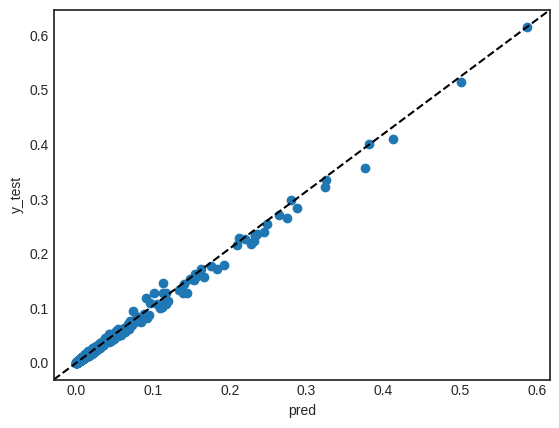

In [116]:
pred = xgb.predict(x_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [117]:
mean_squared_error(y_test, pred)

1.0609244993447395e-05

In [118]:
rmse1 = sqrt(mse(xgb.predict(x_test), y_test))
rmse1

0.003257183598363377

## HyperParameter Tuning

In [119]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [25,50,75]}

In [120]:
from sklearn.metrics import mean_squared_error as mse

def test_params(**params):
    model = XGBRegressor(random_state=0, **params)
    model.fit(x_train, y_train)

    train_rmse = sqrt(mse(model.predict(x_train), y_train))
    val_rmse = sqrt(mse(model.predict(x_test), y_test))
    #print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
    return train_rmse, val_rmse

## Learning Rate

In [121]:
par_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
xs = []
result_list = []
for i in par_list:
  xs.append(i)
  result = test_params(learning_rate=i)
  result_list.append(result)

print(result_list)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[(0.002910612782968027, 0.004226543176293555), (0.002288528744572439, 0.003151674823959968), (0.00197028115519139, 0.0034268070089273663), (0.001777724341280063, 0.004027369197261934), (0.00163550739537473, 0.004088041583438471), (0.001504580122227504, 0.003946899365529947), (0.001399963712520257, 0.004201664546679821), (0.0013849090942859169, 0.0034417987593465768), (0.0013200988827551327, 0.0037459291760171018), (0.0012793700808622385, 0.005441811426722413)]


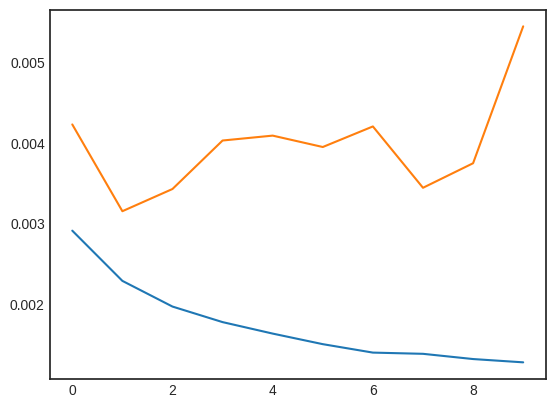

In [122]:
import numpy as np
import matplotlib.pyplot as plt
#Orange is train rmse and blue is val rmse
plt.plot(result_list)
plt.legend()

Best is 3 = 0.2

##Max Depth

In [126]:
parameters_list = []
xs = []
for i in range(2, 10, 1):
  xs.append(i)
  result = test_params(learning_rate=0.2, max_depth=i)
  parameters_list.append(result)

print(parameters_list)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[(0.0028079368446967084, 0.004240359411512458), (0.001777724341280063, 0.004027369197261934), (0.0010821719530339775, 0.0031756726183841126), (0.0006891557201932967, 0.0036344634010060527), (0.0004066283340743344, 0.0042232405393877815), (0.00022464090759811742, 0.003468278014378736), (0.0001158930187233641, 0.004091254650776188), (5.7632323989562385e-05, 0.004659329206917533)]


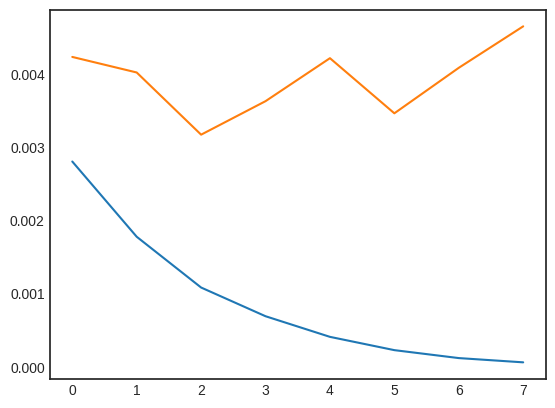

In [127]:
import numpy as np
import matplotlib.pyplot as plt
#Orange is train rmse and blue is val rmse
plt.plot(parameters_list)
plt.legend()

Max_Depth = 3, Learning_rate = 0.2

## Estimators

In [129]:
parameters_list = []
xs = []
for i in range(10, 200, 25):
  xs.append(i)
  #Max_Depth = 3, Learning_rate = 0.2
  result = test_params(max_depth = 3, learning_rate = 0.2, n_estimators=i)
  parameters_list.append(result)

print(parameters_list)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

[(0.007306752495400209, 0.009095779827627368), (0.00275653762025987, 0.004373908474341258), (0.002268719527617168, 0.0041433254653412705), (0.0019223565787651698, 0.00404800895813086), (0.001707262345309825, 0.004000351159213884), (0.0015311895419606613, 0.003949651016447924), (0.0013998677614656125, 0.0038963659633501585), (0.0013124734066890843, 0.003861936146231859)]


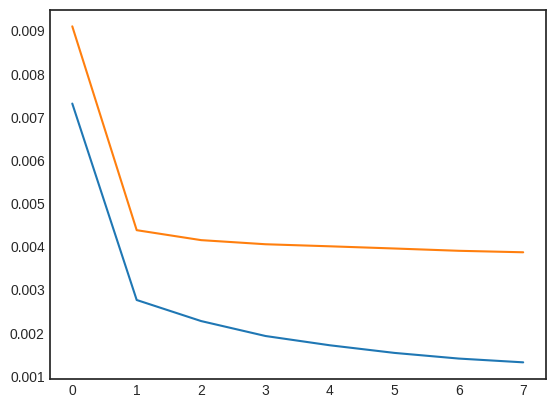

In [130]:
import numpy as np
import matplotlib.pyplot as plt
#Orange is train rmse and blue is val rmse
plt.plot(parameters_list)
plt.legend()

Levels out at 2 which is 60 estimators

## Fit model

In [132]:
xgb = XGBRegressor(n_estimators=60)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [133]:
mean_squared_error(y_test, pred)

1.862445130551116e-05

In [134]:
rmse=sqrt(mse(xgb.predict(x_test), y_test))
rmse

0.004315605554903177

## Best Paramaters

Max_Depth = 3, Learning_rate = 0.2, n_estimators= 60

In [ ]:
xgb = XGBRegressor(n_estimators=60, max_depth = 3, learning_rate = 0.2)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
mean_squared_error(y_test, pred)

1.7167574903114118e-05

In [140]:
rmse=sqrt(mse(xgb.predict(x_test), y_test))
rmse

0.004143377233986077

# **Next**

In [144]:
#Best models
from sklearn.svm import SVR

#Linear regression - no tuning
model_1 = LinearRegression()
#Ridge Regression
model_2 = linear_model.Ridge(alpha=0.0)
#Lasso Regression
model_3 = linear_model.Lasso(alpha=0.0)
#K Nearest Neighbours Regression
model_4 = KNeighborsRegressor(n_neighbors = 10, weights= 'distance')
#Random Forrest Regressor
model_5 = RandomForestRegressor(max_depth=5, n_estimators=550)
#DT Regressors
model_6 = DecisionTreeRegressor(max_depth=3, min_weight_fraction_leaf=0.2)
#SVM Regressor
model_7 = SVR(C=10, gamma=0.001)
#Gradient Boosting Regressor
model_8 = GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)
#XGBoost
model_9 = xg.XGBRegressor(n_estimators=60, max_depth = 3, learning_rate = 0.2)

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9]
print(models)

[<interpret.glassbox._linear.LinearRegression object at 0x79c69da1fdf0>, Ridge(alpha=0.0), Lasso(alpha=0.0), KNeighborsRegressor(n_neighbors=10, weights='distance'), RandomForestRegressor(max_depth=5, n_estimators=550), DecisionTreeRegressor(max_depth=3, min_weight_fraction_leaf=0.2), SVR(C=10, gamma=0.001), GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=

In [145]:
for i in models:
  print(i)

Ridge(alpha=0.0)
Lasso(alpha=0.0)
KNeighborsRegressor(n_neighbors=10, weights='distance')
RandomForestRegressor(max_depth=5, n_estimators=550)
DecisionTreeRegressor(max_depth=3, min_weight_fraction_leaf=0.2)
SVR(C=10, gamma=0.001)
GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
          

In [146]:
#Run each model
model_eval_2 = []
for model in models:
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  type(predictions)
  # Calculate the absolute errors
  errors = abs(predictions - y_test.values)
  # Calculate model evaluation metrics
  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, predictions)
  print(f'MODEL: {model}')
  print('Mean Absolute Error: ', mae, ' degrees.')
  print('Mean Squared Error:', mse, ' degrees')
  print('RMSE:', rmse, ' degrees')
  print('R2:', r2)
  model_eval_2.append({'Model': model, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'RMSE': rmse,'R-squared': r2})

df = pd.DataFrame(model_eval_2)

MODEL: <interpret.glassbox._linear.LinearRegression object at 0x79c69da1fdf0>
Mean Absolute Error:  0.0022959775452661662  degrees.
Mean Squared Error: 2.6741939899128816e-05  degrees
RMSE: 0.005171260958328134  degrees
R2: 0.989634726987857
MODEL: Ridge(alpha=0.0)
Mean Absolute Error:  0.0022948454370370877  degrees.
Mean Squared Error: 2.6731824005630532e-05  degrees
RMSE: 0.005170282778110935  degrees
R2: 0.9896386479449105


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.989e-02, tolerance: 2.209e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

MODEL: Lasso(alpha=0.0)
Mean Absolute Error:  0.002293667777495161  degrees.
Mean Squared Error: 2.6757124520616137e-05  degrees
RMSE: 0.005172728923944898  degrees
R2: 0.9896288413734291
MODEL: KNeighborsRegressor(n_neighbors=10, weights='distance')
Mean Absolute Error:  0.01203398705666428  degrees.
Mean Squared Error: 0.0009542115374140805  degrees
RMSE: 0.030890314621480962  degrees
R2: 0.6301441430972707
MODEL: RandomForestRegressor(max_depth=5, n_estimators=550)
Mean Absolute Error:  0.002289608028103774  degrees.
Mean Squared Error: 2.3488706524898034e-05  degrees
RMSE: 0.004846514884419322  degrees
R2: 0.9908956920570822
MODEL: DecisionTreeRegressor(max_depth=3, min_weight_fraction_leaf=0.2)
Mean Absolute Error:  0.014200354631825778  degrees.
Mean Squared Error: 0.0017060515419527616  degrees
RMSE: 0.0413043767893036  degrees
R2: 0.33872822720299856


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: SVR(C=10, gamma=0.001)
Mean Absolute Error:  0.07365199347467533  degrees.
Mean Squared Error: 0.006140536515639318  degrees
RMSE: 0.07836157550508616  degrees
R2: -1.3800942514162124


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)
Mean Absolute Error:  0.005549015295427159  degrees.
Mean Squared Error: 0.0001578891664477957  degrees
RMSE: 0.012565395594560312  degrees
R2: 0.9388015857464255
MODEL: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mea

In [147]:
df

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,<interpret.glassbox._linear.LinearRegression o...,0.002296,0.000027,0.005171,0.989635
1,Ridge(alpha=0.0),0.002295,0.000027,0.005170,0.989639
2,Lasso(alpha=0.0),0.002294,0.000027,0.005173,0.989629
3,"KNeighborsRegressor(n_neighbors=10, weights='d...",0.012034,0.000954,0.030890,0.630144
4,"(DecisionTreeRegressor(max_depth=5, max_featur...",0.002290,0.000023,0.004847,0.990896
5,"DecisionTreeRegressor(max_depth=3, min_weight_...",0.014200,0.001706,0.041304,0.338728
6,"SVR(C=10, gamma=0.001)",0.073652,0.006141,0.078362,-1.380094
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.005549,0.000158,0.012565,0.938802
8,"XGBRegressor(base_score=None, booster=None, ca...",0.001774,0.000023,0.004777,0.991154


In [150]:
ms = ['Linear', 'Ridge', 'Lasso', 'KNeighbours', 'Random Forrest', 'Decision Tree', 'SVR', 'Gradient Boosting', 'XGBoost']

In [151]:
#Best models in order: RF, DT,  Linear, Ridge, KNR, SVR,
df.insert(1, 'Model_nice_name', ms)
df

,Model,Model_nice_name,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,<interpret.glassbox._linear.LinearRegression o...,Linear,0.002296,0.000027,0.005171,0.989635
1,Ridge(alpha=0.0),Ridge,0.002295,0.000027,0.005170,0.989639
2,Lasso(alpha=0.0),Lasso,0.002294,0.000027,0.005173,0.989629
3,"KNeighborsRegressor(n_neighbors=10, weights='d...",KNeighbours,0.012034,0.000954,0.030890,0.630144
4,"(DecisionTreeRegressor(max_depth=5, max_featur...",Random Forrest,0.002290,0.000023,0.004847,0.990896
5,"DecisionTreeRegressor(max_depth=3, min_weight_...",Decision Tree,0.014200,0.001706,0.041304,0.338728
6,"SVR(C=10, gamma=0.001)",SVR,0.073652,0.006141,0.078362,-1.380094
7,([DecisionTreeRegressor(criterion='friedman_ms...,Gradient Boosting,0.005549,0.000158,0.012565,0.938802
8,"XGBRegressor(base_score=None, booster=None, ca...",XGBoost,0.001774,0.000023,0.004777,0.991154


In [153]:
from google.colab import files
df.to_csv('Tuned_models_results.csv', index=None)
files.download("Tuned_models_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>